# 1. Problem Definition & Dataset Exploration
## Problem Statement
The goal is to predict **health insurance premiums** based on demographic and lifestyle factors using machine learning.

## Dataset Summary
- **Features**:
  - `age`: Age of the individual
  - `sex`: Gender (male/female)
  - `bmi`: Body Mass Index
  - `children`: Number of children
  - `smoker`: Smoking status (yes/no)
  - `region`: Region of residence
  - `charges`: **Target variable (insurance cost)**

In [57]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Health_insurance.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)

# Display basic information
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Data Cleaning & Preprocessing
- Handle missing values
- Identify and handle outliers
- Encode categorical variables
- Normalize/scale numerical features

In [58]:

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Summary statistics
df.describe()


Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


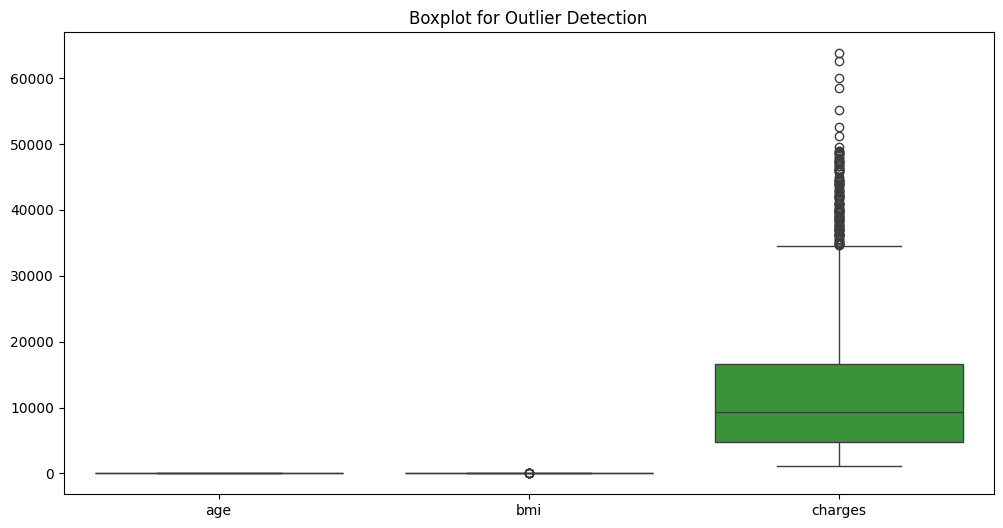

In [59]:

# Handling outliers using boxplot visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'bmi', 'charges']])
plt.title('Boxplot for Outlier Detection')
plt.show()


In [60]:

# Encoding categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)
def encode_region(region):
    region_mapping = {"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3}
    return region_mapping.get(region,-1)

df['region'] = df['region'].apply(encode_region)
# Normalizing numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'bmi']] = scaler.fit_transform(df[['age', 'bmi']])

df.head()


,age,bmi,children,region,charges,sex_male,smoker_yes
0,-1.438764,-0.453320,0,0,16884.92400,False,True
1,-1.509965,0.509621,1,1,1725.55230,True,False
2,-0.797954,0.383307,3,1,4449.46200,True,False
3,-0.441948,-1.305531,0,2,21984.47061,True,False
4,-0.513149,-0.292556,0,2,3866.85520,True,False


# 3. Model Creation
- Select an ML algorithm
- Train model without using libraries

In [63]:

# Splitting the dataset
from sklearn.model_selection import train_test_split

X = df.drop(columns=['charges'])  # Features
y = df['charges']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and test sets created.")



Training and test sets created.


# 4. Model Evaluation
- Test the model
- Compute performance metrics
- Check for overfitting/underfitting

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")



Mean Absolute Error: 4186.508898366437
Mean Squared Error: 33635210.43117843
R2 Score: 0.7833463107364538
[ 8924.40724442  7116.29501758 36909.01352144  9507.87469118
 27013.3500079  10790.77956153   226.29844571 16942.71599941
  1056.63079407 11267.91997309 28048.59793155  9424.36324087
  5326.32232088 38460.06017922 40303.40597026 37147.01010262
 15287.91876684 35965.05485917  9179.1753067  31510.8319849
  3797.79068365 10070.82803304  2312.57551348  7074.41348194
 11352.37224357 12907.77079523 14448.84678727  6205.65997921
  9917.00839638  2239.50032819  9060.55469043 13120.56214535
  4617.70702822  3467.91218926  4402.74821855 12967.91608907
  1927.44498944  8757.9180081  33324.35180597 32638.47697026
  3852.41756615  4370.39670883 14080.76023234 11478.63402576
  8829.26135924 12046.15119133  5322.80515731  3100.71182484
 35546.60547574  9201.61196817 15894.23763341  2406.04003607
 12397.52052544  1433.90617387 13448.14094304 12519.54174599
  4295.28664609 32202.67982224 13263.1712

# 5. Advanced Model Training
- Cross-validation
- Model comparison
- Hyperparameter tuning

In [69]:

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

print(f"Cross-validation scores: {cv_scores}")
print(f"Average R2 Score: {cv_scores.mean()}")


Cross-validation scores: [0.78522549 0.73213924 0.73490618 0.67241306 0.7716613  0.78358383
 0.79318159 0.67054582 0.74216232 0.76222839]
Average R2 Score: 0.7448047213193172


# 6. Visualization of Metrics
- Display all types of graphs related to performance

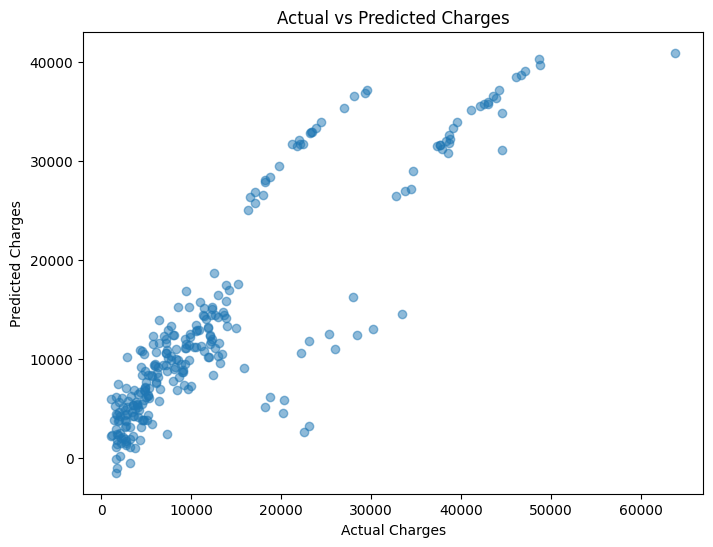

In [70]:

# Visualizing actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()


# 9. Save Model in pkl file


In [71]:
import pickle

# Load the model
model_path = "model.pkl"
with open(model_path, "wb") as file:
    model = pickle.dump(model,file) 